In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# dust.csv 읽음
dust = pd.read_csv('dust.csv')

FileNotFoundError: ignored

In [0]:
# dust : 8016 row, 7 column
dust.shape

(8016, 7)

In [0]:
# dust 첫 5행
dust.head()

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
0,01-01-01,39.0,24.0,0.003,0.054,0.7,0.003
1,01-01-02,38.0,27.0,0.002,0.056,0.8,0.003
2,01-01-03,42.0,28.0,0.002,0.057,0.9,0.003
3,01-01-04,42.0,31.0,0.002,0.054,0.8,0.003
4,01-01-05,49.0,33.0,0.002,0.048,0.8,0.003


In [0]:
# 각 column별 null 개수
dust.isnull().sum()

날짜         0
PM10      50
PM2.5     36
오 존       39
이산화질소     39
일산화탄소    924
아황산가스     40
dtype: int64

In [0]:
# 월, 일, 시간 column 생성
dust['month'] = np.NaN
dust['day'] = np.NaN
dust['hour'] = np.NaN

In [0]:
# column 이름을 영어로 변환하고 순서 재정렬
dust.columns = ['date','pm10', 'pm2.5', 'o3', 'no2', 'co', 'so2', 'month','day','hour']
dust = dust[['date','month','day','hour', 'so2', 'co', 'o3', 'no2', 'pm10', 'pm2.5']]

In [0]:
# split을 이용해서 month, day, hour 값 채움
for i in range(dust.shape[0]):
  dust.loc[i, 'month'] = str(dust.loc[i,'date']).split('-')[0]
  dust.loc[i, 'day'] = str(dust.loc[i,'date']).split('-')[1]
  dust.loc[i, 'hour'] = str(dust.loc[i,'date']).split('-')[2]

In [0]:
dust.head()

,date,month,day,hour,so2,co,o3,no2,pm10,pm2.5
0,01-01-01,01,01,01,0.003,0.7,0.003,0.054,39.0,24.0
1,01-01-02,01,01,02,0.003,0.8,0.002,0.056,38.0,27.0
2,01-01-03,01,01,03,0.003,0.9,0.002,0.057,42.0,28.0
3,01-01-04,01,01,04,0.003,0.8,0.002,0.054,42.0,31.0
4,01-01-05,01,01,05,0.003,0.8,0.002,0.048,49.0,33.0


In [0]:
# 시계열 분석이므로 null값을 이전 시간의 값을 기준으로 채워줌
dust = dust.fillna(method='pad')

In [0]:
dust.isnull().sum()

date     0
month    0
day      0
hour     0
so2      0
co       0
o3       0
no2      0
pm10     0
pm2.5    0
dtype: int64

In [0]:
# 각 column별 데이터 타입
dust.dtypes

date      object
month     object
day       object
hour      object
so2      float64
co       float64
o3       float64
no2      float64
pm10     float64
pm2.5    float64
dtype: object

In [0]:
# month, day, hour column을 int형으로 변환
dust['month'] = dust['month'].astype(int)
dust['day'] = dust['day'].astype(int)
dust['hour'] = dust['hour'].astype(int)

In [0]:
# weather.csv 파일 읽음
weather = pd.read_csv('weather.csv', encoding = 'cp949')

In [0]:
# dust와 동일한 개수의 row를 가짐 
weather.shape

(8016, 7)

In [0]:
weather.head()

,지점,지점명,날짜,기온,강수량,풍속,습도
0,108,서울,01-01-01,-5.5,NaN,1.0,54.0
1,108,서울,01-01-02,-5.9,NaN,1.8,56.0
2,108,서울,01-01-03,-6.5,NaN,1.2,60.0
3,108,서울,01-01-04,-6.9,NaN,2.2,62.0
4,108,서울,01-01-05,-7.2,NaN,1.2,57.0


In [0]:
# 지점, 지점명 column 삭제 후 column 명 영어로 변환
weather = weather.drop(weather.columns[[0]], axis='columns')
weather = weather.drop(weather.columns[[0]], axis='columns')
weather.columns = ['date','temp', 'rain', 'wind', 'humid']

In [0]:
weather.head()

,date,temp,rain,wind,humid
0,01-01-01,-5.5,NaN,1.0,54.0
1,01-01-02,-5.9,NaN,1.8,56.0
2,01-01-03,-6.5,NaN,1.2,60.0
3,01-01-04,-6.9,NaN,2.2,62.0
4,01-01-05,-7.2,NaN,1.2,57.0


In [0]:
weather.dtypes

date      object
temp     float64
rain     float64
wind     float64
humid    float64
dtype: object

In [0]:
## 강수량이 0인 값을 0.01, NaN을 0으로 변환
weather = weather.replace({'rain': 0}, {'rain': 0.01})
weather = weather.fillna(0)

In [0]:
weather.head()

,date,temp,rain,wind,humid
0,01-01-01,-5.5,0.0,1.0,54.0
1,01-01-02,-5.9,0.0,1.8,56.0
2,01-01-03,-6.5,0.0,1.2,60.0
3,01-01-04,-6.9,0.0,2.2,62.0
4,01-01-05,-7.2,0.0,1.2,57.0


In [0]:
# dust와 weather이 동일하게 가진 date를 기준으로 train 생성
train = pd.merge(dust,weather, on=['date'])

In [0]:
# data가 잘 병합되었는지 확인
train.head(50)

,date,month,day,hour,so2,co,o3,no2,pm10,pm2.5,temp,rain,wind,humid
0,01-01-01,1,1,1,0.003,0.7,0.003,0.054,39.0,24.0,-5.5,0.0,1.0,54.0
1,01-01-02,1,1,2,0.003,0.8,0.002,0.056,38.0,27.0,-5.9,0.0,1.8,56.0
2,01-01-03,1,1,3,0.003,0.9,0.002,0.057,42.0,28.0,-6.5,0.0,1.2,60.0
3,01-01-04,1,1,4,0.003,0.8,0.002,0.054,42.0,31.0,-6.9,0.0,2.2,62.0
4,01-01-05,1,1,5,0.003,0.8,0.002,0.048,49.0,33.0,-7.2,0.0,1.2,57.0
5,01-01-06,1,1,6,0.003,0.8,0.002,0.048,47.0,32.0,-7.6,0.0,2.1,59.0
6,01-01-07,1,1,7,0.003,0.7,0.006,0.040,48.0,30.0,-7.9,0.0,1.3,60.0
7,01-01-08,1,1,8,0.003,0.5,0.014,0.032,33.0,24.0,-7.7,0.0,1.3,58.0
8,01-01-09,1,1,9,0.003,0.8,0.004,0.049,36.0,22.0,-7.7,0.0,0.9,57.0
9,01-01-10,1,1,10,0.003,0.6,0.016,0.031,35.0,25.0,-7.0,0.0,0.9,50.0


In [0]:
# date에서 시간 부분 삭제
train["date"] = train["date"].str[:5]

In [0]:
train.head()

,date,month,day,hour,so2,co,o3,no2,pm10,pm2.5,temp,rain,wind,humid
0,01-01,1,1,1,0.003,0.7,0.003,0.054,39.0,24.0,-5.5,0.0,1.0,54.0
1,01-01,1,1,2,0.003,0.8,0.002,0.056,38.0,27.0,-5.9,0.0,1.8,56.0
2,01-01,1,1,3,0.003,0.9,0.002,0.057,42.0,28.0,-6.5,0.0,1.2,60.0
3,01-01,1,1,4,0.003,0.8,0.002,0.054,42.0,31.0,-6.9,0.0,2.2,62.0
4,01-01,1,1,5,0.003,0.8,0.002,0.048,49.0,33.0,-7.2,0.0,1.2,57.0


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1d43ffe10>,
      dtype=object)

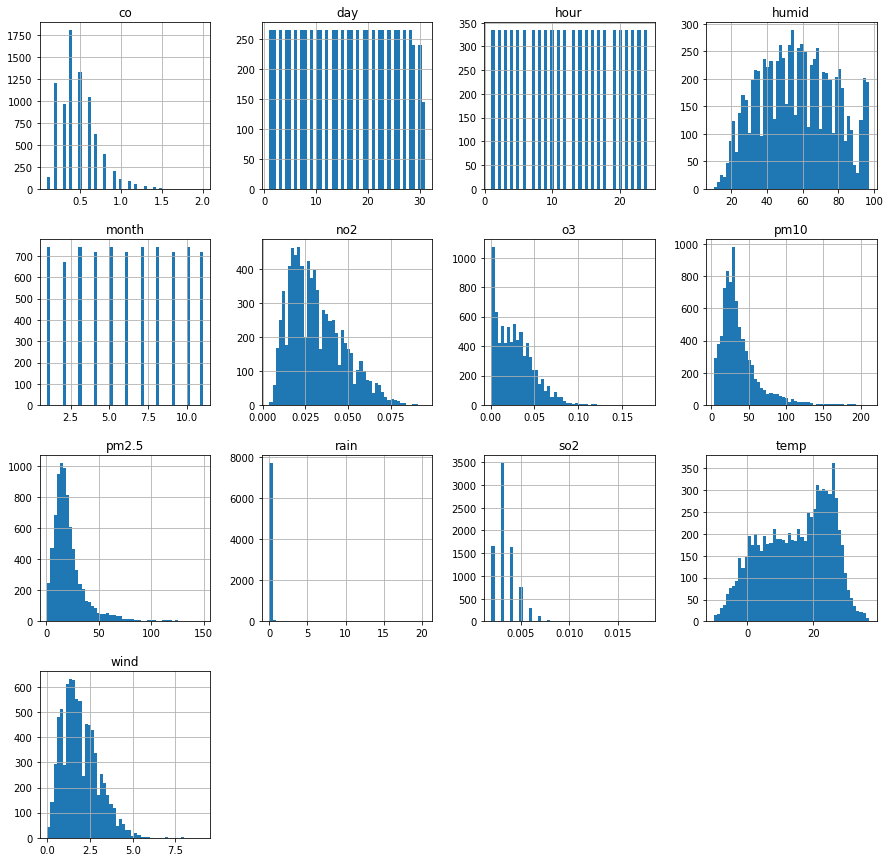

In [0]:
# 각 column별 히스토그램 출력
train.hist(bins=50, figsize=(15,15)) #bins : 구간 경곗값

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

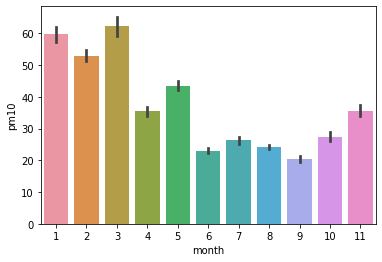

In [0]:
# 월별 미세먼지 평균 현황
graph1 = sns.barplot(x="month", y="pm10", data=train)
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

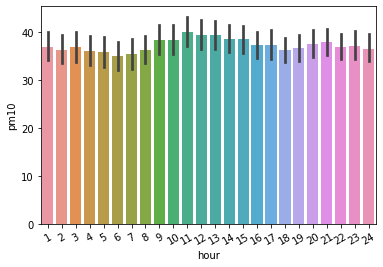

In [0]:
# 시간별 미세먼지 평균
graph2 = sns.barplot(x="hour", y="pm10", data=train)
plt.xticks(rotation=30)

In [0]:
# 변수 별 상관관계
corr = train.corr()

In [0]:
# 미세먼지를 기준으로 각 변수와의 상관관계
corr['pm10'].sort_values(ascending=False)

pm10     1.000000
pm2.5    0.905420
co       0.637272
so2      0.565913
no2      0.441067
o3       0.032545
hour     0.011189
wind    -0.057446
day     -0.074347
rain    -0.095634
humid   -0.146793
temp    -0.324087
month   -0.410552
Name: pm10, dtype: float64

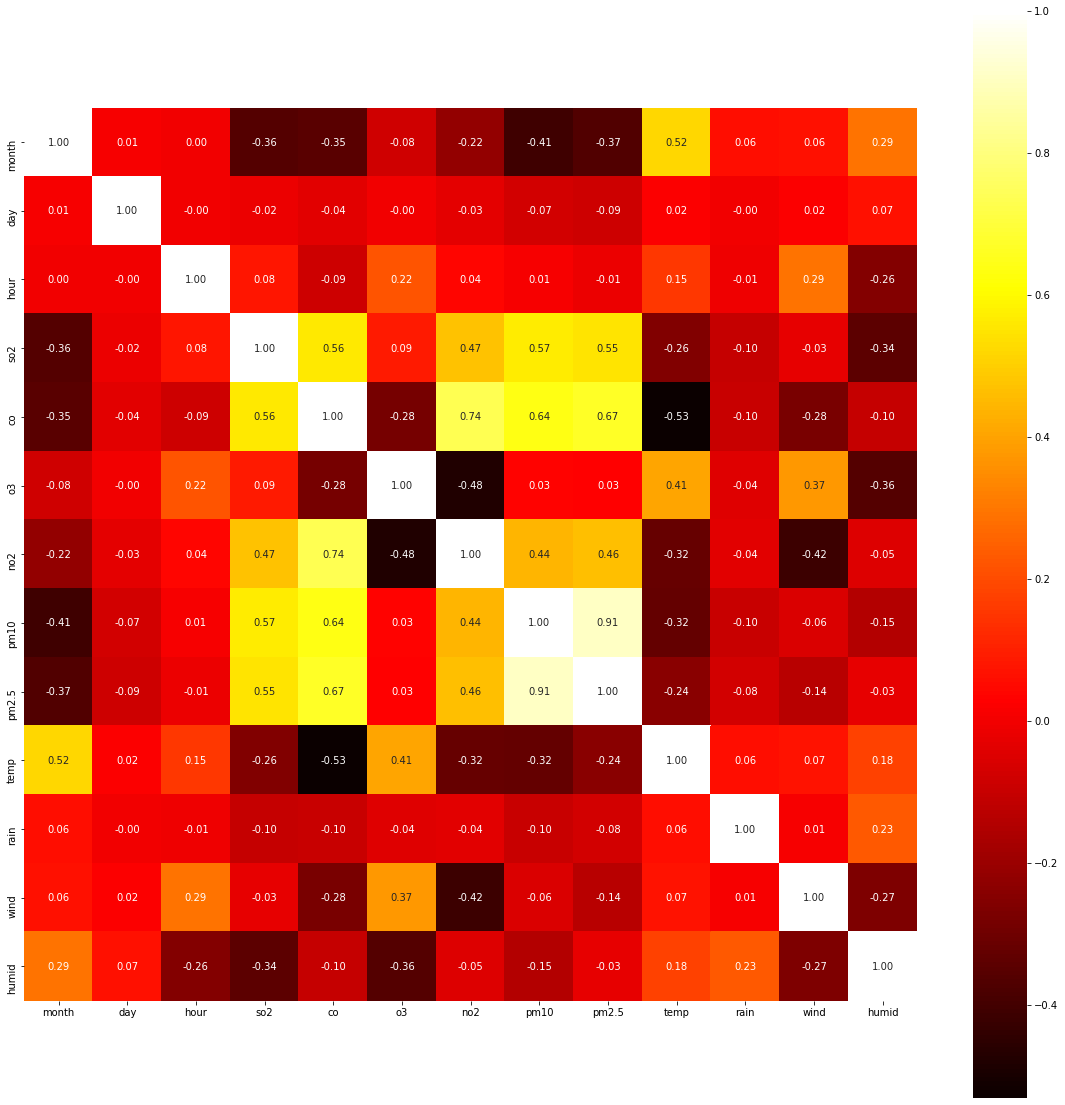

In [0]:
# 각 변수 간의 관계를 한 번에 출력하는 히트맵 
plt.figure(figsize=(20,20))
df_heatmap = sns.heatmap(corr, cbar = True, annot = True,
                         annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'hot')

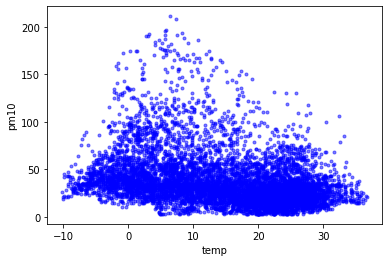

In [0]:
# 온도와 미세먼지 무관함 확인
plt.plot('temp', 'pm10', data=train, linestyle = 'none', marker = 'o',
         markersize = 3, color = 'blue', alpha = 0.5)
plt.xlabel('temp', fontsize = 10)
plt.ylabel('pm10', fontsize = 10)
plt.show()

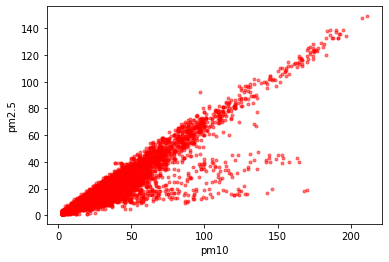

In [0]:
# 미세먼지와 초미세먼지의 연관성 확인
plt.plot('pm10', 'pm2.5', data=train, linestyle = 'none', marker = 'o',
         markersize = 3, color = 'red', alpha = 0.5)
plt.xlabel('pm10', fontsize = 10)
plt.ylabel('pm2.5', fontsize = 10)
plt.show()

In [0]:
# 배열 및 배열의 열 합치는 기능
from numpy import array
from numpy import hstack

# 높은 해상도로 출력
%config InlineBackend.figure_format = 'retina'

# deep learning을 위한 keras
from keras.models import Sequential # Sequential : layer를 선형으로 쌓음
from keras.layers import Dense, LSTM # Dense : 계산 수행 layer
# Dense 레이어는 입력과 출력을 모두 연결 

Using TensorFlow backend.


LSTM(Long short-term memory) : RNN(순환신경망)이 가진 장기 의존성 문제를 극복한 알고리즘으로 오랫동안 정보를 기억하는 기능 탑재

기본적으로 RNN에는 내부에 loop를 가진 모듈이 1개의 layer만을 가진 것에 비해 LSTM은 같은 구조를 가지면서 4개의 layer를 가짐

In [0]:
# 미세먼지와 초미세먼지를 array로 변환
pm10 = array(train['pm10'])
pm25 = array(train['pm2.5'])

In [0]:
# 난수 seed 생성
np.random.seed(777)

In [0]:
# LSTM의 입력에 대한 출력을 매핑하는 작업 시작
# 시계열 예측을 위한 다층 퍼셉트론 모델 함수
# 위에서 생성한 array를 샘플이라고 하는 여러 입력 / 출력의 패턴으로 분할
# 5개가 입력되고 그 다음 1개가 출력으로 사용되는 방식
steps = 5
features = 1
def split_sequence(sequence, steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		end_index = i + steps
		if end_index > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_index], sequence[end_index]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [0]:
## 각 array가 8016개에서 steps 수를 제외한 8011개의 array로 변함
x_pm10, y_pm10 = split_sequence(pm10, steps)
print(x_pm10.shape, y_pm10.shape)

(8011, 5) (8011,)


In [0]:
x_pm25, y_pm25 = split_sequence(pm25, steps)
print(x_pm25.shape, y_pm25.shape)

(8011, 5) (8011,)


In [0]:
x_pm10

array([[39., 38., 42., 42., 49.],
       [38., 42., 42., 49., 47.],
       [42., 42., 49., 47., 48.],
       ...,
       [61., 73., 66., 47., 44.],
       [73., 66., 47., 44., 46.],
       [66., 47., 44., 46., 46.]])

In [0]:
# reshape : 배열 재구조
x_pm10 = x_pm10.reshape((x_pm10.shape[0], x_pm10.shape[1], features))
x_pm25 = x_pm25.reshape((x_pm25.shape[0], x_pm25.shape[1], features))

In [0]:
x_pm10 

array([[[39.],
        [38.],
        [42.],
        [42.],
        [49.]],

       [[38.],
        [42.],
        [42.],
        [49.],
        [47.]],

       [[42.],
        [42.],
        [49.],
        [47.],
        [48.]],

       ...,

       [[61.],
        [73.],
        [66.],
        [47.],
        [44.]],

       [[73.],
        [66.],
        [47.],
        [44.],
        [46.]],

       [[66.],
        [47.],
        [44.],
        [46.],
        [46.]]])

In [0]:
model = Sequential()
model.add(LSTM(300, activation='relu', input_shape=(steps,features))) # activation 함수로 reLU 사용
model.add(Dense(1)) # 출력 layer가 1개라는 의미 
model.compile(optimizer='adam', loss='mse') ##train 과정 : default로 adam, 손실함수 : mse(최소제곱오차)
histogram = model.fit(x_pm10, y_pm10, epochs=50, batch_size=100, verbose = 1) ##verbose : 진행과정 표시





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





8011/8011 [==============================] - 5s 602us/step - loss: 161.1387
Epoch 2/50
8011/8011 [==============================] - 4s 528us/step - loss: 41.8924
Epoch 3/50
8011/8011 [==============================] - 4s 528us/step - loss: 38.1582
Epoch 4/50
8011/8011 [==============================] - 4s 524us/step - loss: 35.7857
Epoch 5/50
8011/8011 [==============================] - 4s 526us/step - loss: 36.5229
Epoch 6/50
8011/8011 [==============================] - 4s 522us/step - loss: 34.7750
Epoch 7/50
8011/8011 [==============================] - 4s 523us/step - loss: 34.0277
Epoch 8/50
8011/8011 [==============================] - 4s 512us/step - loss: 34.1203
Epoch 9/50
8011/8011 [==============================] - 4s 514us/step - loss: 34.1794
Epoch 10/50
8011/8011 [==============================] - 4s 517us/step - loss: 37.8035
Epoch 11/50
8011/8011 [=========

In [0]:
# test.csv 읽음
test = pd.read_csv('test.csv')

In [0]:
test.head()

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
0,2019-01-01,36,25,0.020,0.030,0.6,0.003
1,2019-01-02,33,22,0.015,0.036,0.6,0.004
2,2019-01-03,35,22,0.007,0.048,0.7,0.004
3,2019-01-04,55,38,0.003,0.068,1.0,0.006
4,2019-01-05,60,38,0.021,0.030,0.6,0.005


In [0]:
# test의 미세먼지를 array로 생성
test_pm10 = array(test["PM10"])
x_test, y_test = split_sequence(test_pm10, steps)

In [0]:
x_test

array([[ 36,  33,  35,  55,  60],
       [ 33,  35,  55,  60,  42],
       [ 35,  55,  60,  42,  51],
       [ 55,  60,  42,  51,  38],
       [ 60,  42,  51,  38,  47],
       [ 42,  51,  38,  47,  51],
       [ 51,  38,  47,  51,  71],
       [ 38,  47,  51,  71,  89],
       [ 47,  51,  71,  89, 107],
       [ 51,  71,  89, 107, 155],
       [ 71,  89, 107, 155, 122],
       [ 89, 107, 155, 122,  43],
       [107, 155, 122,  43,  39],
       [155, 122,  43,  39,  53],
       [122,  43,  39,  53,  87],
       [ 43,  39,  53,  87,  59],
       [ 39,  53,  87,  59,  42],
       [ 53,  87,  59,  42,  61],
       [ 87,  59,  42,  61,  69],
       [ 59,  42,  61,  69,  36],
       [ 42,  61,  69,  36,  44],
       [ 61,  69,  36,  44,  40],
       [ 69,  36,  44,  40,  34],
       [ 36,  44,  40,  34,  73],
       [ 44,  40,  34,  73,  62],
       [ 40,  34,  73,  62,  54],
       [ 34,  73,  62,  54,  63],
       [ 73,  62,  54,  63,  35],
       [ 62,  54,  63,  35,  56],
       [ 54,  

In [0]:
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], features))

In [0]:
y_hat_test = model.predict(x_test)

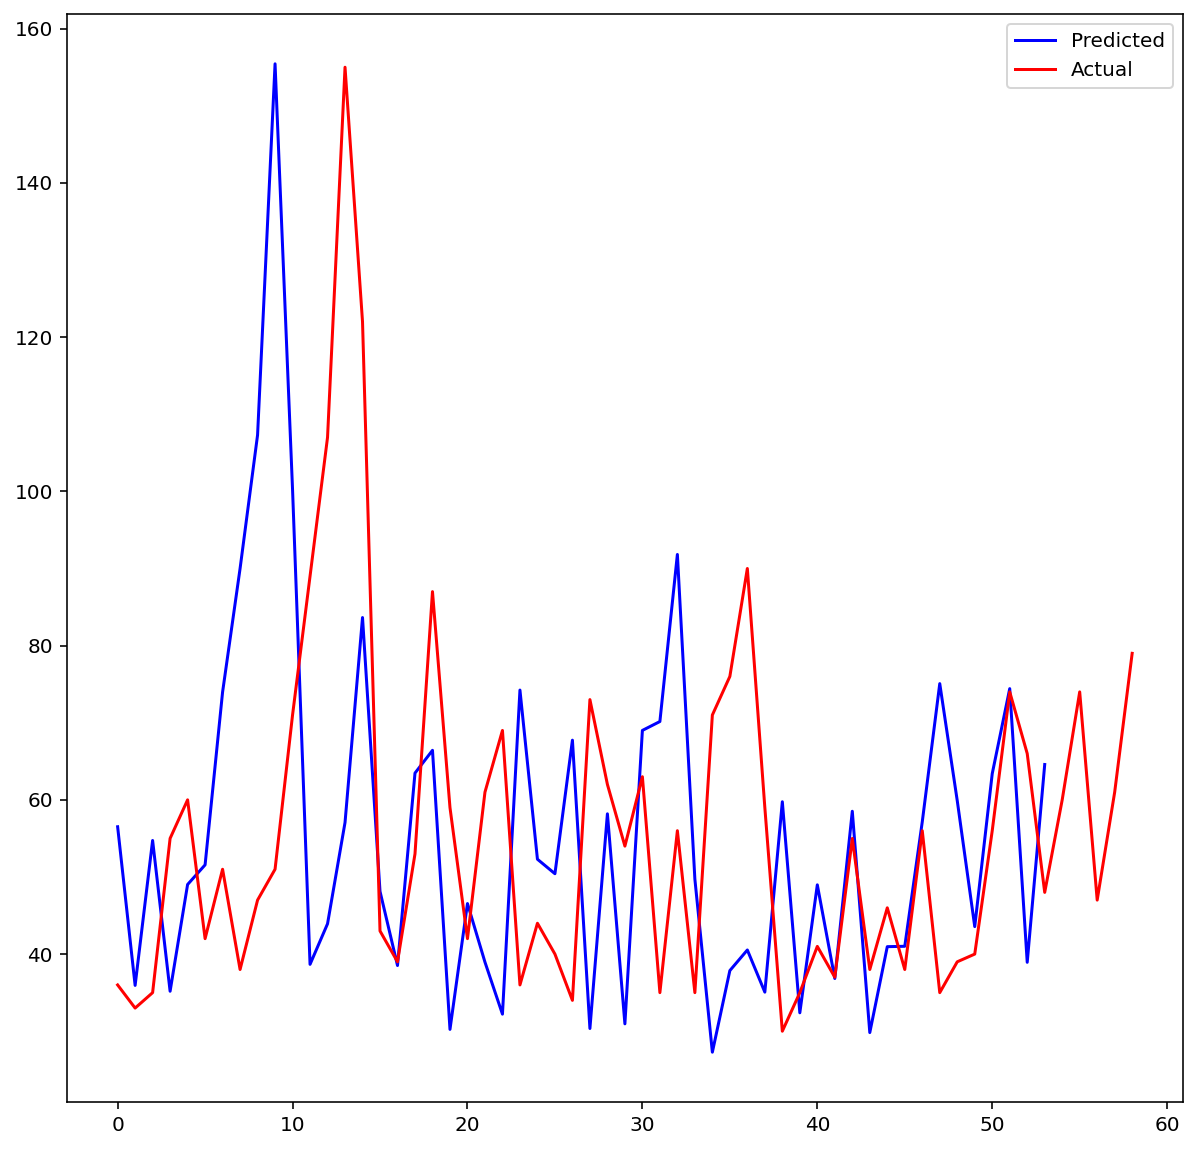

In [0]:
# 예측 모델 출력
plt.figure(figsize=(10,10))
plt.plot(y_hat_test, '#0000FF') # 예측 값 blue
plt.plot(test_pm10, '#FF0000') # 실제 값 red
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [0]:
# test의 초미세먼지를 array로 생성
test_pm25 = array(test["PM2.5"])
x_test, y_test = split_sequence(test_pm25, steps)

In [0]:
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], features))

In [0]:
y_hat_test = model.predict(x_test)

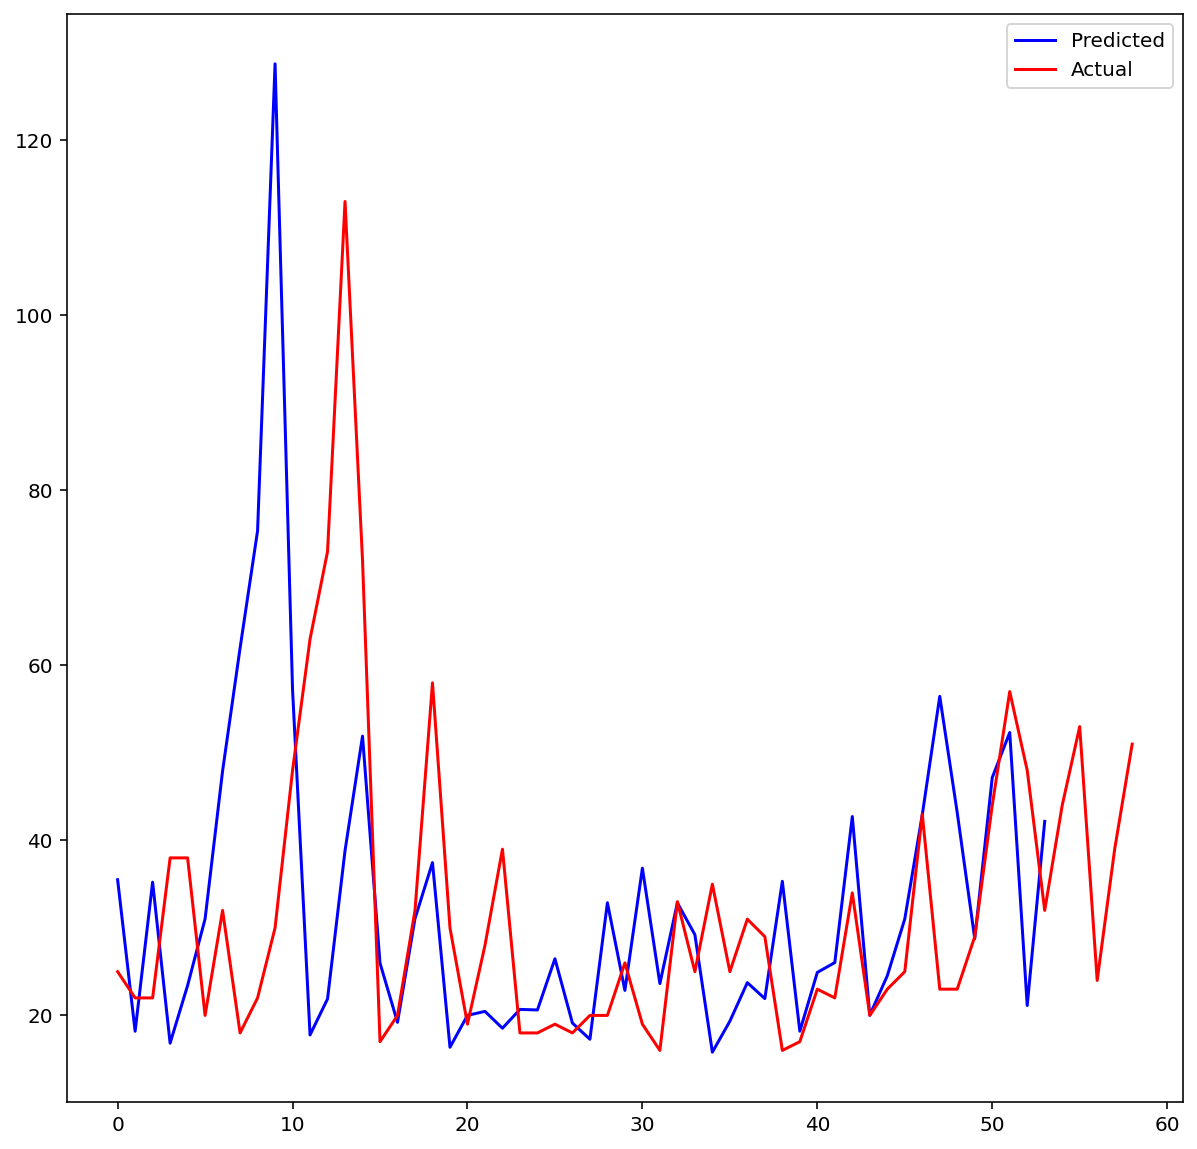

In [0]:
# 예측 모델 출력
plt.figure(figsize=(10,10))
plt.plot(y_hat_test, '#0000FF') # 예측 값 blue
plt.plot(test_pm25, '#FF0000') # 실제 값 red
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()